## *Project: Searching for Top 15 cities in CA and top 5 Cities in CA counties based on different criteria (based on data received from Cencus API for the year 2019)*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
import scipy.stats as sts
import random
from scipy.stats import sem
from collections import Counter
import gmaps
from my_keys import g_key

# Set the seed so our data is reproducible
random.seed(50)
gmaps.configure(api_key=g_key)

In [2]:
ca_2019_data=pd.read_csv("output_census/census_ca_2019.csv")
ca_2019_data.head()

Zipcode  Population  Median Age  Household Income  Per Capita Income  \
0    90001     59832.0        29.1           43360.0            13727.0   
1    90002     53302.0        28.0           37285.0            13284.0   
2    90003     73730.0        28.3           40598.0            13441.0   
3    90004     60541.0        35.2           49675.0            32090.0   
4    90005     39732.0        35.6           38491.0            24267.0   

   Poverty Rate  Unemployment Rate  House Value  House Construction Year  \
0     25.496390           3.929335     359000.0                     1949   
1     31.188323           4.110540     345900.0                     1954   
2     29.959311           4.002441     362800.0                     1954   
3     17.784642           2.685783    1063200.0                     1946   
4     25.999195           3.289540     777100.0                     1950   

   Monthly Owner Cost  ...  White Population Rate  Black Population Rate  \
0              1853.0  ...              41.882270               8.921647   
1              1813.0  ...              42.973997              18.912986   
2              1892.0  ...              33.116777              20.676794   
3              3489.0  ...              35.676649               3.614080   
4              3149.0  ...              23.336354               5.763616   

   Hispanic Population Rate  Asian Population Rate         City  \
0                 90.134042               0.315884  Los Angeles   
1                 78.886346               1.029980  Los Angeles   
2                 78.348027               0.297030  Los Angeles   
3                 50.289886              25.465387  Los Angeles   
4                 49.481526              34.221786  Los Angeles   

               County    Lat     Lng  Housing_units  State  
0  Los Angeles County  33.97 -118.25        13788.0     CA  
1  Los Angeles County  33.95 -118.25        12598.0     CA  
2  Los Angeles County  33.96 -118.27        17127.0     CA  
3  Los Angeles County  34.08 -118.31        24278.0     CA  
4  Los Angeles County  34.06 -118.31        16345.0     CA  

[5 rows x 30 columns]

In [3]:
ca_2019_data.columns

Index(['Zipcode', 'Population', 'Median Age', 'Household Income',
       'Per Capita Income', 'Poverty Rate', 'Unemployment Rate', 'House Value',
       'House Construction Year', 'Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Personal Transport Rate',
       'Commute Time Public', 'Commute Time Car', 'High School Rate',
       'College Rate', 'Uneducated Rate', 'English Language',
       'Spanish Language', 'White Population Rate', 'Black Population Rate',
       'Hispanic Population Rate', 'Asian Population Rate', 'City', 'County',
       'Lat', 'Lng', 'Housing_units', 'State'],
      dtype='object')

In [4]:
filt=ca_2019_data[['House Value','Monthly Owner Cost', 'Monthly Rent']]>0
ca_2019_data=ca_2019_data[filt.all(1)]
ca_2019_data

Zipcode  Population  Median Age  Household Income  Per Capita Income  \
0       90001     59832.0        29.1           43360.0            13727.0   
1       90002     53302.0        28.0           37285.0            13284.0   
2       90003     73730.0        28.3           40598.0            13441.0   
3       90004     60541.0        35.2           49675.0            32090.0   
4       90005     39732.0        35.6           38491.0            24267.0   
...       ...         ...         ...               ...                ...   
1757    96145      2147.0        49.9           73875.0            47689.0   
1758    96146      1145.0        43.8           76851.0            61141.0   
1759    96148       580.0        31.3           73611.0            28961.0   
1760    96150     29327.0        38.8           57396.0            35049.0   
1762    96161     18488.0        41.5           98924.0            53453.0   

      Poverty Rate  Unemployment Rate  House Value  House Construction Year  \
0        25.496390           3.929335     359000.0                     1949   
1        31.188323           4.110540     345900.0                     1954   
2        29.959311           4.002441     362800.0                     1954   
3        17.784642           2.685783    1063200.0                     1946   
4        25.999195           3.289540     777100.0                     1950   
...            ...                ...          ...                      ...   
1757      5.076851           0.000000     666300.0                     1974   
1758      3.930131           1.135371     911900.0                     1981   
1759     20.862069           0.000000     750000.0                     1978   
1760     10.815972           3.808777     442300.0                     1973   
1762      8.464950           1.119645     604100.0                     1989   

      Monthly Owner Cost  ...  White Population Rate  Black Population Rate  \
0                 1853.0  ...              41.882270               8.921647   
1                 1813.0  ...              42.973997              18.912986   
2                 1892.0  ...              33.116777              20.676794   
3                 3489.0  ...              35.676649               3.614080   
4                 3149.0  ...              23.336354               5.763616   
...                  ...  ...                    ...                    ...   
1757              2419.0  ...              96.413600               0.000000   
1758              2745.0  ...              93.886463               0.000000   
1759              3375.0  ...             100.000000               0.000000   
1760              1953.0  ...              83.943124               0.907014   
1762              2625.0  ...              91.718953               0.546300   

      Hispanic Population Rate  Asian Population Rate              City  \
0                    90.134042               0.315884       Los Angeles   
1                    78.886346               1.029980       Los Angeles   
2                    78.348027               0.297030       Los Angeles   
3                    50.289886              25.465387       Los Angeles   
4                    49.481526              34.221786       Los Angeles   
...                        ...                    ...               ...   
1757                  2.095948               0.698649        Tahoe City   
1758                  6.812227               0.000000    Olympic Valley   
1759                 38.103448               0.000000       Tahoe Vista   
1760                 25.277048               5.544379  South Lake Tahoe   
1762                 13.841411               1.125054           Truckee   

                  County     Lat      Lng  Housing_units  State  
0     Los Angeles County  33.970 -118.250        13788.0     CA  
1     Los Angeles County  33.950 -118.250        12598.0     CA  
2     Los Angeles County  33.960 -118.270        17127.0     CA  
3     

### *box plot for House value and monthly rent in different counties in CA in 2019*

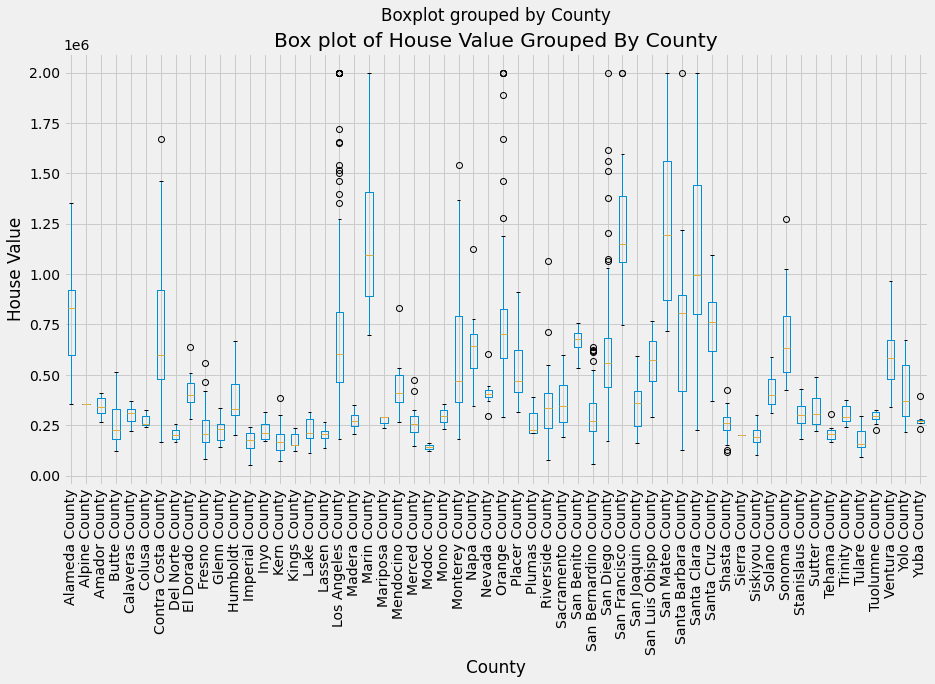

In [5]:
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(15,8))
ca_2019_data.boxplot(column=["House Value"], by='County', ax=ax)
plt.xticks(rotation=90)
plt.ylabel("House Value")
ax.set_title('Box plot of House Value Grouped By County')
plt.show()

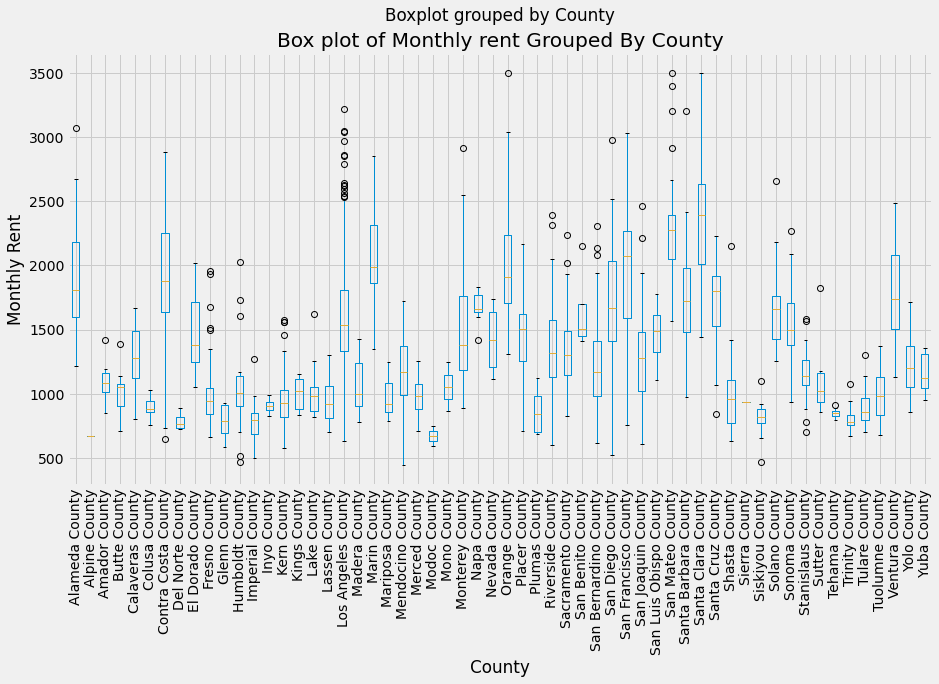

In [6]:
plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(figsize=(15,8))
ca_2019_data.boxplot(column=["Monthly Rent"], by='County', ax=ax)
plt.xticks(rotation=90)
plt.ylabel("Monthly Rent")
ax.set_title('Box plot of Monthly rent Grouped By County')
plt.show()

### *BOXPLOT for population in CA counties*

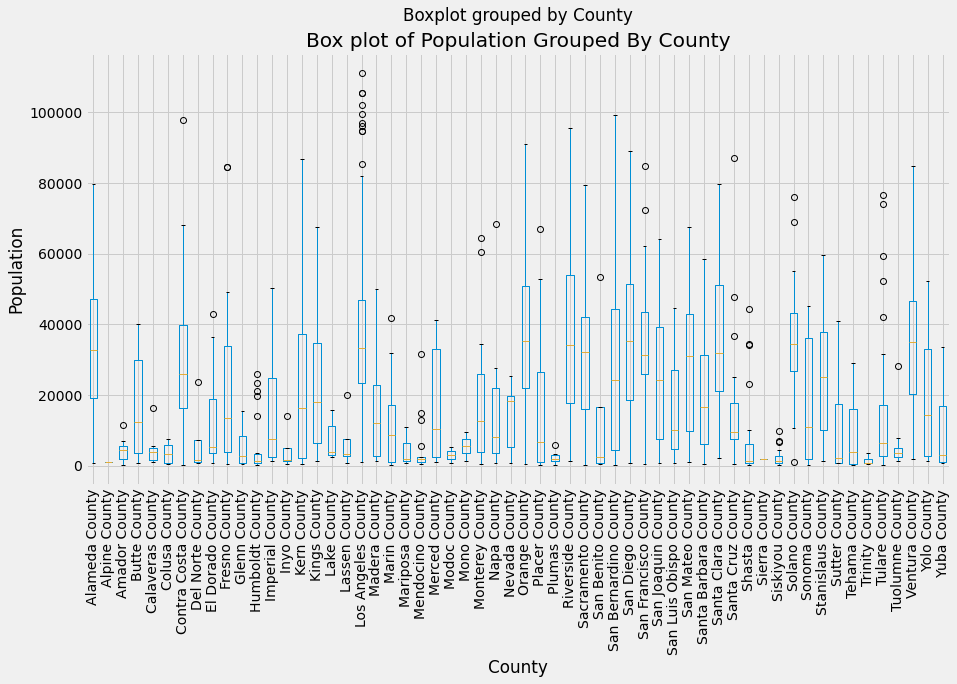

In [7]:
plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(figsize=(15,8))
ca_2019_data.boxplot(column=["Population"], by='County', ax=ax)
plt.xticks(rotation=90)
plt.ylabel("Population")
ax.set_title('Box plot of Population Grouped By County')
plt.show()

### *Boxplot median Age in CA Counties*

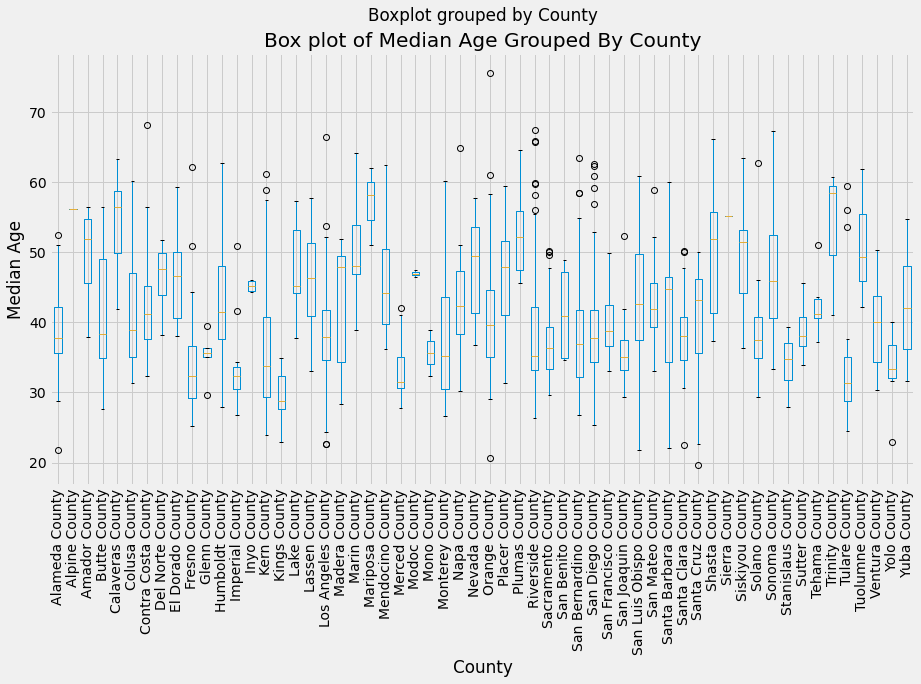

In [8]:
plt.style.use("fivethirtyeight")

fig, ax = plt.subplots(figsize=(15,8))
ca_2019_data.boxplot(column=["Median Age"], by='County', ax=ax)
plt.xticks(rotation=90)
plt.ylabel("Median Age")
ax.set_title('Box plot of Median Age Grouped By County')
plt.show()

### *Taking Samples from CA-2019 data*

In [9]:
sample_set=[ca_2019_data.sample(200, axis=0) for x in range (0,10)]

### *Generating errorbar plot to see variation of house values*

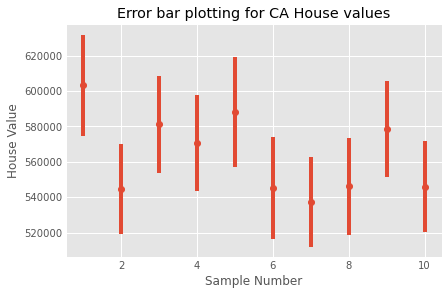

In [10]:
means=[sample["House Value"].mean() for sample in sample_set]
std_errors=[sem(sample["House Value"])for sample in sample_set]

x_axis=np.arange(0,len(sample_set),1)+1

plt.style.use("ggplot")
fig,ax=plt.subplots()
ax.errorbar(x_axis,means,std_errors,fmt="o")
ax.set_xlabel("Sample Number")
ax.set_ylabel("House Value")
ax.set_title("Error bar plotting for CA House values")
plt.show()

### *Generating errorbar plot to see variation in Monthly Rent*

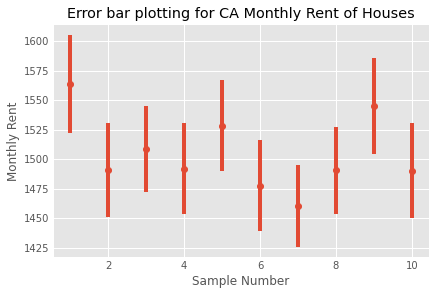

In [11]:
means=[sample["Monthly Rent"].mean() for sample in sample_set]
std_errors=[sem(sample["Monthly Rent"])for sample in sample_set]

x_axis=np.arange(0,len(sample_set),1)+1

plt.style.use("ggplot")
fig,ax=plt.subplots()
ax.errorbar(x_axis,means,std_errors,fmt="o")
ax.set_xlabel("Sample Number")
ax.set_ylabel("Monthly Rent")
ax.set_title("Error bar plotting for CA Monthly Rent of Houses")
plt.show()

### *Checking factors that affect House value and Monthly Rent*

In [12]:
ca_2019_data.columns

Index(['Zipcode', 'Population', 'Median Age', 'Household Income',
       'Per Capita Income', 'Poverty Rate', 'Unemployment Rate', 'House Value',
       'House Construction Year', 'Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Personal Transport Rate',
       'Commute Time Public', 'Commute Time Car', 'High School Rate',
       'College Rate', 'Uneducated Rate', 'English Language',
       'Spanish Language', 'White Population Rate', 'Black Population Rate',
       'Hispanic Population Rate', 'Asian Population Rate', 'City', 'County',
       'Lat', 'Lng', 'Housing_units', 'State'],
      dtype='object')

In [13]:
## Filtering Columns for Numeric Values

ca_data=ca_2019_data[["Population",'Household Income',
       'Per Capita Income', 'Poverty Rate', 'Unemployment Rate', 'House Value',
       'House Construction Year', 'Monthly Owner Cost', 'Monthly Rent',
       'Public Transport Rate', 'Personal Transport Rate',
       'Commute Time Public', 'Commute Time Car', 'High School Rate',
       'College Rate', 'Uneducated Rate', 'White Population Rate', 'Black Population Rate',
       'Hispanic Population Rate', 'Asian Population Rate',"Housing_units"]]

In [14]:
ca_data_corr=ca_data.corr()
print(ca_data_corr.unstack().sort_values())

Public Transport Rate    Personal Transport Rate   -0.727316
Personal Transport Rate  Public Transport Rate     -0.727316
High School Rate         Monthly Owner Cost        -0.666636
Monthly Owner Cost       High School Rate          -0.666636
White Population Rate    Asian Population Rate     -0.663185
                                                      ...   
Uneducated Rate          Uneducated Rate            1.000000
White Population Rate    White Population Rate      1.000000
Black Population Rate    Black Population Rate      1.000000
Public Transport Rate    Public Transport Rate      1.000000
Housing_units            Housing_units              1.000000
Length: 441, dtype: float64


In [15]:
ca_data_corr.style.background_gradient(cmap='coolwarm')

### *Collecting Data from CSV files and merging it for plotting*

In [16]:
## reading csv files for older years

ca_data_2012=pd.read_csv("output_census/census_ca_2012.csv")
ca_data_2019=pd.read_csv("output_census/census_ca_2019.csv")
ca_data_2014=pd.read_csv("output_census/census_ca_2014.csv")
ca_data_2015=pd.read_csv("output_census/census_ca_2015.csv")
ca_data_2017=pd.read_csv("output_census/census_ca_2017.csv")

In [17]:
## mearging each year data for plotting

merge1=pd.merge(ca_data_2019,ca_data_2017,how="inner",left_on=['Lat', 'Lng'],right_on=['Lat', 'Lng'],suffixes=("2019","2017"))


In [18]:
merge1=merge1[['Zipcode2019','City2019','County2019','Lat', 'Lng',
               'House Value2019','House Construction Year2019', 'Monthly Owner Cost2019',
               'Monthly Rent2019', 'House Value2017','House Construction Year2017',
               'Monthly Owner Cost2017','Monthly Rent2017']]

In [19]:
merge1.rename(columns={"Zipcode2019":"Zipcode","City2019":"City","County2019":"County"},inplace=True)

In [20]:
merge2=pd.merge(merge1,ca_data_2015,how="inner",left_on=['Lat','Lng'],right_on=['Lat','Lng']) 


In [21]:
merge2=merge2[['Zipcode_x', 'City_x', 'County_x', 'Lat', 'Lng', 'House Value2019',
       'House Construction Year2019', 'Monthly Owner Cost2019',
       'Monthly Rent2019', 'House Value2017', 'House Construction Year2017',
       'Monthly Owner Cost2017', 'Monthly Rent2017', 'House Value', 'House Construction Year',
       'Monthly Owner Cost', 'Monthly Rent']]

In [22]:
merge2.rename(columns={"Zipcode_x":"Zipcode", 'City_x':"City", 'County_x':"County",
                      'House Value':"House Value2015", 'House Construction Year':'House Construction Year2015',
       'Monthly Owner Cost':'Monthly Owner Cost2015', 'Monthly Rent':'Monthly Rent2015'},inplace=True)

In [23]:
merge3=pd.merge(merge2,ca_data_2014,how="inner",left_on=['Lat','Lng'],right_on=['Lat','Lng']) 


In [24]:
merge3=merge3[['Zipcode_x', 'City_x', 'County_x', 'Lat', 'Lng', 'House Value2019',
       'House Construction Year2019', 'Monthly Owner Cost2019',
       'Monthly Rent2019', 'House Value2017', 'House Construction Year2017',
       'Monthly Owner Cost2017', 'Monthly Rent2017', 'House Value2015',
       'House Construction Year2015', 'Monthly Owner Cost2015',
       'Monthly Rent2015', 'House Value', 'House Construction Year',
       'Monthly Owner Cost', 'Monthly Rent']]

In [25]:
merge3.rename(columns={'Zipcode_x':"Zipcode", 'City_x':"City", 'County_x':"County",
                      'House Value':"House Value2014",'House Construction Year':'House Construction Year2014',
       'Monthly Owner Cost':"Monthly Owner Cost2014", 'Monthly Rent':'Monthly Rent2014'},inplace=True)

In [26]:
merge4=pd.merge(merge3,ca_data_2012,how="inner",left_on=['Lat','Lng'],right_on=['Lat','Lng']) 
merge4.columns

Index(['Zipcode_x', 'City_x', 'County_x', 'Lat', 'Lng', 'House Value2019',
       'House Construction Year2019', 'Monthly Owner Cost2019',
       'Monthly Rent2019', 'House Value2017', 'House Construction Year2017',
       'Monthly Owner Cost2017', 'Monthly Rent2017', 'House Value2015',
       'House Construction Year2015', 'Monthly Owner Cost2015',
       'Monthly Rent2015', 'House Value2014', 'House Construction Year2014',
       'Monthly Owner Cost2014', 'Monthly Rent2014', 'Zipcode_y', 'Population',
       'Median Age', 'Household Income', 'Per Capita Income', 'Poverty Rate',
       'Unemployment Rate', 'House Value', 'House Construction Year',
       'Monthly Owner Cost', 'Monthly Rent', 'Public Transport Rate',
       'Personal Transport Rate', 'Commute Time Public', 'Commute Time Car',
       'High School Rate', 'College Rate', 'Uneducated Rate',
       'English Language Rate', 'Spanish Language Rate',
       'White Population Rate', 'Black Population Rate',
       'Hispanic Pop

In [27]:
merge4=merge4[['Zipcode_x', 'City_x', 'County_x', 'Lat', 'Lng', 'House Value2019',
       'House Construction Year2019', 'Monthly Owner Cost2019',
       'Monthly Rent2019', 'House Value2017', 'House Construction Year2017',
       'Monthly Owner Cost2017', 'Monthly Rent2017', 'House Value2015',
       'House Construction Year2015', 'Monthly Owner Cost2015',
       'Monthly Rent2015', 'House Value2014', 'House Construction Year2014',
       'Monthly Owner Cost2014', 'Monthly Rent2014','House Value','House Construction Year',
       'Monthly Owner Cost', 'Monthly Rent']]

In [28]:
merge4.rename(columns={'Zipcode_x':"Zipcode", 'City_x':"City", 'County_x':"County",
                      'House Value':'House Value2012','House Construction Year':'House Construction Year2012',
       'Monthly Owner Cost':'Monthly Owner Cost2012', 'Monthly Rent':'Monthly Rent2012'},inplace=True)


In [29]:
## cleaning data with negative entries

filt=merge4.iloc[:,5:]>0
combined=merge4[filt.all(1)]
combined.head()

Zipcode         City              County    Lat     Lng  House Value2019  \
0    90001  Los Angeles  Los Angeles County  33.97 -118.25         359000.0   
1    90002  Los Angeles  Los Angeles County  33.95 -118.25         345900.0   
2    90003  Los Angeles  Los Angeles County  33.96 -118.27         362800.0   
3    90004  Los Angeles  Los Angeles County  34.08 -118.31        1063200.0   
4    90005  Los Angeles  Los Angeles County  34.06 -118.31         777100.0   

   House Construction Year2019  Monthly Owner Cost2019  Monthly Rent2019  \
0                         1949                  1853.0            1150.0   
1                         1954                  1813.0            1187.0   
2                         1954                  1892.0            1212.0   
3                         1946                  3489.0            1307.0   
4                         1950                  3149.0            1235.0   

   House Value2017  ...  Monthly Owner Cost2015  Monthly Rent2015  \
0         305500.0  ...                  1637.0             984.0   
1         272400.0  ...                  1619.0             991.0   
2         300700.0  ...                  1675.0            1075.0   
3         918500.0  ...                  3490.0            1090.0   
4         713400.0  ...                  3103.0             952.0   

   House Value2014  House Construction Year2014  Monthly Owner Cost2014  \
0         241800.0                       1951.0                  1649.0   
1         218800.0                       1951.0                  1633.0   
2         228600.0                       1949.0                  1683.0   
3         724900.0                       1949.0                  3578.0   
4         635500.0                       1953.0                  3252.0   

   Monthly Rent2014  House Value2012  House Construction Year2012  \
0             975.0         263100.0                       1950.0   
1             968.0         238300.0                       1952.0   
2            1064.0         248400.0                       1951.0   
3            1070.0         818400.0                       1950.0   
4             939.0         664400.0                       1954.0   

   Monthly Owner Cost2012  Monthly Rent2012  
0                  1650.0             950.0  
1                  1801.0             940.0  
2                  1834.0             999.0  
3                  3636.0            1040.0  
4                  3150.0             920.0  

[5 rows x 25 columns]

In [30]:
combined.columns

Index(['Zipcode', 'City', 'County', 'Lat', 'Lng', 'House Value2019',
       'House Construction Year2019', 'Monthly Owner Cost2019',
       'Monthly Rent2019', 'House Value2017', 'House Construction Year2017',
       'Monthly Owner Cost2017', 'Monthly Rent2017', 'House Value2015',
       'House Construction Year2015', 'Monthly Owner Cost2015',
       'Monthly Rent2015', 'House Value2014', 'House Construction Year2014',
       'Monthly Owner Cost2014', 'Monthly Rent2014', 'House Value2012',
       'House Construction Year2012', 'Monthly Owner Cost2012',
       'Monthly Rent2012'],
      dtype='object')

In [31]:
## taking county-wise average for plotting data 

func_dict={'House Value2019':"median",'Monthly Owner Cost2019':"median",'Monthly Rent2019':"median",
           'House Value2017':"median",'Monthly Owner Cost2017':"median",'Monthly Rent2017':"median",
           'House Value2015':"median",'Monthly Owner Cost2015':"median",'Monthly Rent2015':"median", 
           'House Value2014':"median",'Monthly Owner Cost2014':"median",'Monthly Rent2014':"median", 
           'House Value2012':"median",'Monthly Owner Cost2012':"median",'Monthly Rent2012':"median"}

county_combined=combined.groupby('County').agg(func_dict)
county_combined.head()

House Value2019  Monthly Owner Cost2019  Monthly Rent2019  \
County                                                                        
Alameda County           793400.0                  2949.0            1810.0   
Alpine County            357200.0                  1840.0             675.0   
Amador County            310400.0                  1801.0            1111.0   
Butte County             228850.0                  1493.0            1059.0   
Calaveras County         311450.0                  1729.5            1285.5   

                  House Value2017  Monthly Owner Cost2017  Monthly Rent2017  \
County                                                                        
Alameda County           666200.0                  2659.0            1577.0   
Alpine County            329800.0                  1800.0             950.0   
Amador County            280300.0                  1812.0            1077.0   
Butte County             187800.0                  1370.5             974.0   
Calaveras County         273000.0                  1902.0            1156.0   

                  House Value2015  Monthly Owner Cost2015  Monthly Rent2015  \
County                                                                        
Alameda County           547900.0                  2581.0            1430.0   
Alpine County            292900.0                  2093.0             779.0   
Amador County            257800.0                  1770.0            1092.0   
Butte County             171000.0                  1344.0             915.5   
Calaveras County         234950.0                  1734.0             938.5   

                  House Value2014  Monthly Owner Cost2014  Monthly Rent2014  \
County                                                                        
Alameda County           535400.0                  2531.0            1425.0   
Alpine County            315500.0                  2269.0             743.0   
Amador County            239700.0                  1849.0            1076.0   
Butte County             169600.0                  1382.5             914.0   
Calaveras County         229000.0                  1771.5            1014.5   

                  House Value2012  Monthly Owner Cost2012  Monthly Rent2012  
County                                                                       
Alameda County           531300.0                  2667.0            1345.0  
Alpine County            373300.0                  2344.0             729.0  
Amador County            299000.0                  1889.0            1095.0  
Butte County             204250.0                  1472.0             843.0  
Calaveras County         274050.0                  1674.5             853.5

### *Change in Housevalue in CA counties in years*

In [32]:
ca_2019_data["County"].value_counts()
counties=(ca_2019_data["County"].value_counts()).keys()

[]

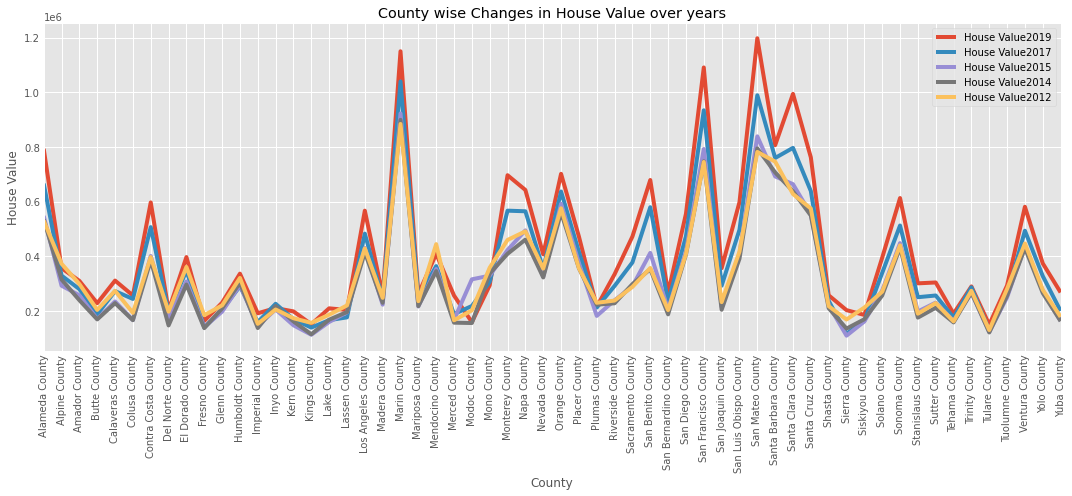

In [33]:
x_values=np.arange(0,len(counties),1)
county_combined_house_value=county_combined[["House Value2019","House Value2017",
                                             "House Value2015","House Value2014","House Value2012"]]

county_combined_house_value.plot.line(xticks=x_values,rot=90,figsize=(15,7))

plt.style.use("ggplot")
plt.xlim(0,57)
plt.xlabel("County")
plt.ylabel("House Value")
plt.title("County wise Changes in House Value over years")
plt.tight_layout()
plt.plot()

### *Change in Monthly Owner Cost in CA counties in years*

[]

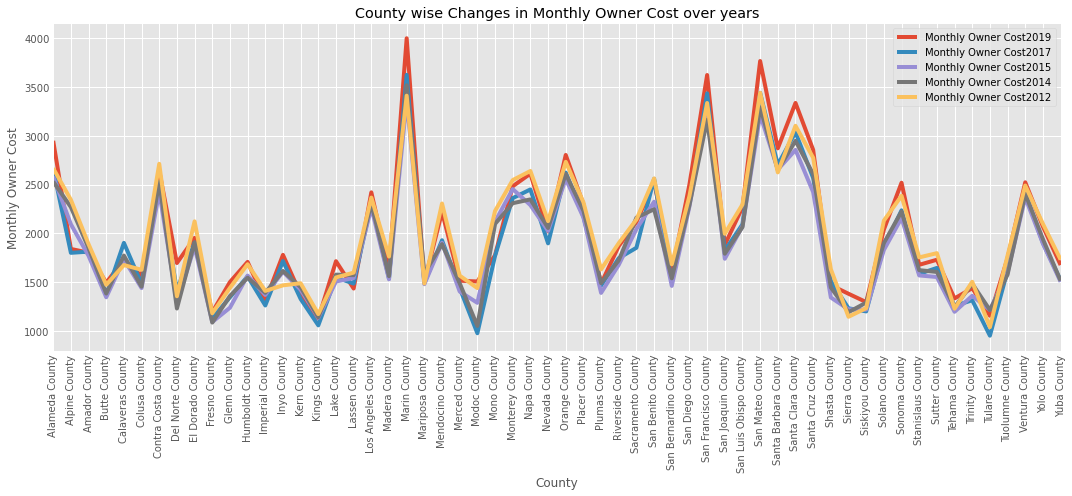

In [34]:
x_values=np.arange(0,len(counties),1)
county_combined_monthly_cost=county_combined[["Monthly Owner Cost2019","Monthly Owner Cost2017",
                                             "Monthly Owner Cost2015","Monthly Owner Cost2014",
                                             "Monthly Owner Cost2012"]]
                                             
county_combined_monthly_cost.plot.line(xticks=x_values,rot=90,figsize=(15,7))

plt.style.use("ggplot")
plt.xlim(0,57)
plt.xlabel("County")
plt.ylabel("Monthly Owner Cost")
plt.title("County wise Changes in Monthly Owner Cost over years")
plt.tight_layout()
plt.plot()

### *Change in monthly rent in CA counties in years*

[]

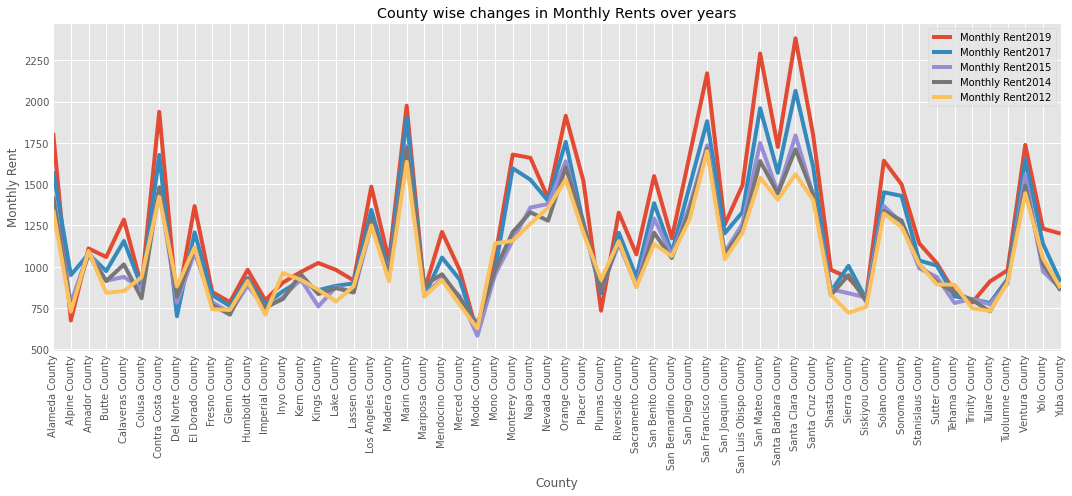

In [35]:
x_values=np.arange(0,len(counties),1)
county_combined_monthly_cost=county_combined[["Monthly Rent2019",'Monthly Rent2017','Monthly Rent2015',
                                              'Monthly Rent2014','Monthly Rent2012']]
                                             
county_combined_monthly_cost.plot.line(xticks=x_values,rot=90,figsize=(15,7))

plt.style.use("ggplot")
plt.xlim(0,57)
plt.xlabel("County")
plt.ylabel("Monthly Rent")
plt.title("County wise changes in Monthly Rents over years")
plt.legend(loc="best")
plt.tight_layout()
plt.plot()

### *Scastter plot: High School Rate vs College Rate*

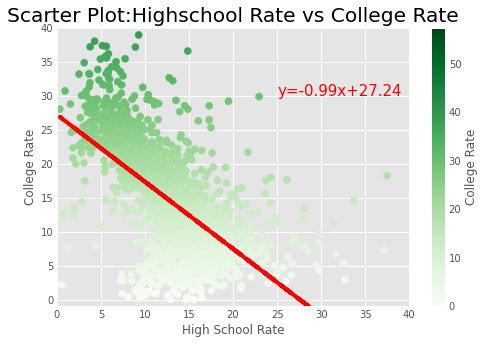

In [36]:
x_values=ca_2019_data["High School Rate"]
y_values=ca_2019_data["College Rate"]

(slope,intercept,rvalue, pvalue, stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

ca_2019_data.plot(kind="scatter",x="High School Rate",y="College Rate",s=50,figsize=(7,5),
                  c="College Rate",cmap="Greens")

plt.style.use("fivethirtyeight")
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(25,30),fontsize=15,color="red")
plt.xlim(0,40)
plt.ylim(-1,40)
plt.xlabel("High School Rate")
plt.title("Scarter Plot:Highschool Rate vs College Rate")
plt.tight_layout()
plt.show()

### *Scatter Plot High School Rate vs Uneducated Rate*

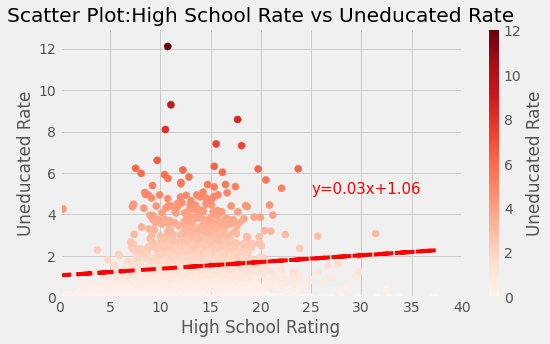

In [37]:
x_values=ca_2019_data["High School Rate"]
y_values=ca_2019_data["Uneducated Rate"]

(slope,intercept,rvalue, pvalue, stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

ca_2019_data.plot(kind="scatter",x="High School Rate",y="Uneducated Rate",s=50,figsize=(8,5),
                  c="Uneducated Rate",cmap="Reds")

plt.style.use("fivethirtyeight")
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(25,5),fontsize=15,color="red")
plt.xlim(0,40)
plt.ylim(0,13)
plt.xlabel("High School Rating")
plt.title("Scatter Plot:High School Rate vs Uneducated Rate")
plt.tight_layout()
plt.show()

### *Scatter Plot:College Rate vs Uneducated Rate*

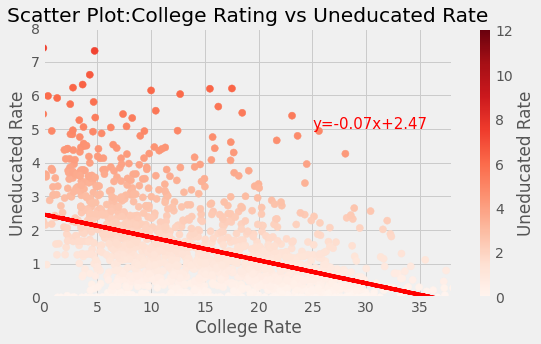

In [38]:
x_values=ca_2019_data["College Rate"]
y_values=ca_2019_data["Uneducated Rate"]

(slope,intercept,rvalue, pvalue, stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

ca_2019_data.plot(kind="scatter",x="College Rate",y="Uneducated Rate",s=50,figsize=(8,5),
                  c="Uneducated Rate",cmap="Reds")

plt.style.use("fivethirtyeight")
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(25,5),fontsize=15,color="red")
plt.xlim(0,38)
plt.ylim(0,8)
plt.xlabel("College Rate")
plt.title("Scatter Plot:College Rating vs Uneducated Rate")
plt.tight_layout()
plt.show()

### *Scatter Plot College Rate vs House Value*

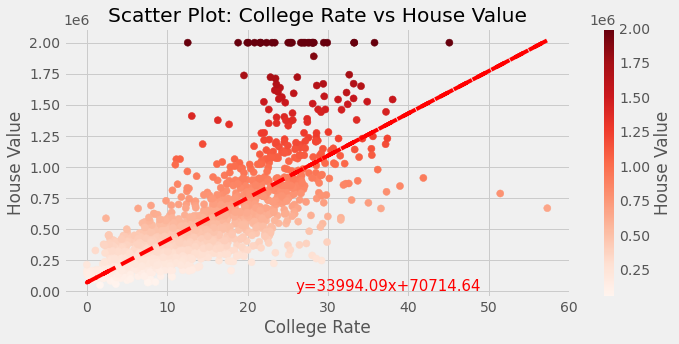

In [39]:
x_values=ca_2019_data["College Rate"]
y_values=ca_2019_data["House Value"]

(slope,intercept,rvalue, pvalue, stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

ca_2019_data.plot(kind="scatter",x="College Rate",y="House Value",s=50,figsize=(10,5),
                 c="House Value",cmap="Reds")

plt.style.use("fivethirtyeight")
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(26,5.5),fontsize=15,color="red")
plt.xlabel("College Rate")
plt.title("Scatter Plot: College Rate vs House Value")
plt.tight_layout()
plt.show()

### *Scatter Plot College Rate vs Monthly Rent*

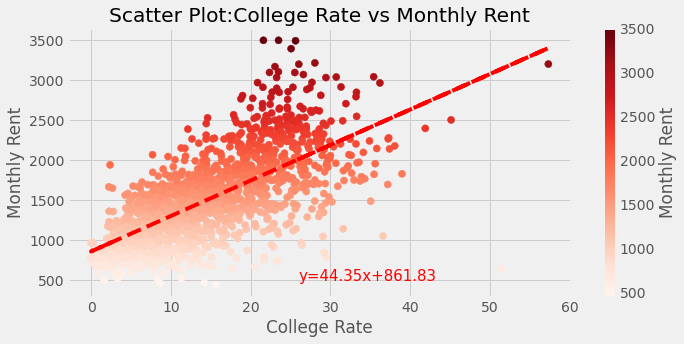

In [40]:
x_values=ca_2019_data["College Rate"]
y_values=ca_2019_data["Monthly Rent"]

(slope,intercept,rvalue, pvalue, stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

ca_2019_data.plot(kind="scatter",x="College Rate",y="Monthly Rent",figsize=(10,5),s=50,
                 c="Monthly Rent",cmap="Reds")

plt.style.use("fivethirtyeight")
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(26,500),fontsize=15,color="red")
plt.xlabel("College Rate")
plt.title("Scatter Plot:College Rate vs Monthly Rent")
plt.tight_layout()
plt.show()

### *Scatter Plot: High School Rate vs Unemployment Rate*

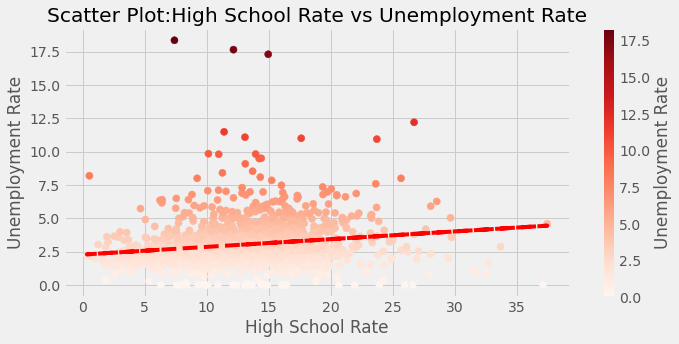

In [41]:
x_values=ca_2019_data["High School Rate"]
y_values=ca_2019_data["Unemployment Rate"]

(slope,intercept,rvalue, pvalue, stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

ca_2019_data.plot(kind="scatter",x="High School Rate",y="Unemployment Rate",s=50,figsize=(10,5),
                 c="Unemployment Rate",cmap="Reds")

plt.style.use("fivethirtyeight")
plt.plot(x_values,regress_values,"r--")
plt.xlabel("High School Rate")
plt.title("Scatter Plot:High School Rate vs Unemployment Rate")
plt.tight_layout()
plt.show()

### *Scatter Plot College Rate vs Unemployment Rate*

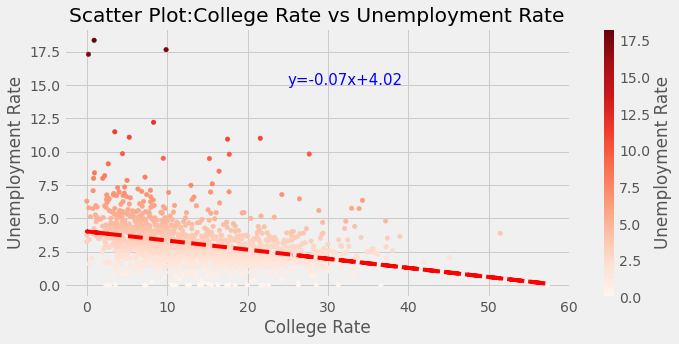

In [42]:
x_values=ca_2019_data["College Rate"]
y_values=ca_2019_data["Unemployment Rate"]

(slope,intercept,rvalue, pvalue, stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

ca_2019_data.plot(kind="scatter",x="College Rate",y="Unemployment Rate",figsize=(10,5),
                 c="Unemployment Rate",cmap="Reds")

plt.style.use("fivethirtyeight")
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(25,15),fontsize=15,color="blue")
plt.xlabel("College Rate")
plt.title("Scatter Plot:College Rate vs Unemployment Rate")
plt.tight_layout()
plt.show()

### *Pie Chart to see educated and uneducated percentage in CA in 2019*

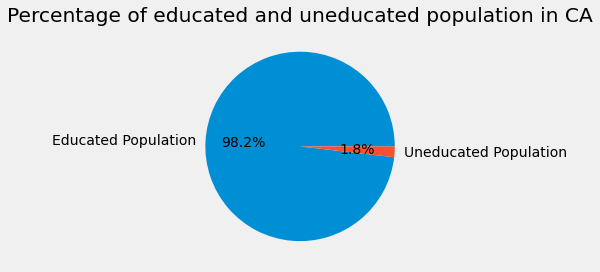

In [43]:
ca_total_population=ca_2019_data['Population'].sum()
ca_uneducated=((ca_2019_data['Population']*ca_2019_data["Uneducated Rate"])/100).sum(axis=0)
ca_educated=(ca_total_population-ca_uneducated)

slices=[ca_educated,ca_uneducated]
labels=["Educated Population","Uneducated Population"]

plt.style.use("fivethirtyeight")
plt.pie(slices,labels=labels,autopct="%1.1f%%")
plt.title("Percentage of educated and uneducated population in CA")
plt.tight_layout()
plt.show()

### *Data cleaning for community Analisys*

In [44]:
community_data=ca_2019_data[['Zipcode','City', 'County',"Lat","Lng",'Population','White Population Rate', 'Black Population Rate',
       'Hispanic Population Rate', 'Asian Population Rate','Per Capita Income','Poverty Rate',
              'House Value','Monthly Rent']]

community_data=community_data[(community_data[["Population","White Population Rate",
                               "Black Population Rate","Hispanic Population Rate",
                               "Asian Population Rate","Per Capita Income","Poverty Rate",
                               "House Value","Monthly Rent"]] > 0).all(1)]


In [45]:
func_dict={"Population":"mean","White Population Rate":"mean","Black Population Rate":"mean",
          "Hispanic Population Rate":"mean","Asian Population Rate":"mean","Per Capita Income":"median",
          "Poverty Rate":"median","House Value":"median","Monthly Rent":"median"}

county_data=community_data.groupby("County").agg(func_dict)
county_data.head()

Population  White Population Rate  Black Population Rate  \
County                                                                         
Alameda County    35296.744681              45.062947              10.917284   
Amador County      5857.666667              88.057896               1.394229   
Butte County      24120.111111              81.814108               1.447117   
Calaveras County   6397.600000              89.634802               0.976781   
Colusa County      4844.250000              84.216659               5.782163   

                  Hispanic Population Rate  Asian Population Rate  \
County                                                              
Alameda County                   19.584477              26.879626   
Amador County                    14.920002               1.373313   
Butte County                     16.535448               4.422557   
Calaveras County                 13.152214               1.848259   
Colusa County                    48.810121               1.502470   

                  Per Capita Income  Poverty Rate  House Value  Monthly Rent  
County                                                                        
Alameda County              49921.0      8.282540     832700.0        1810.0  
Amador County               34551.5      8.894729     310350.0        1130.5  
Butte County                28547.0     13.774149     231000.0        1068.0  
Calaveras County            32599.0      8.125963     324300.0        1492.0  
Colusa County               27395.0     11.647496     255550.0         862.5

### *Bar Chart of percentage of population of different communities in different CA counties*

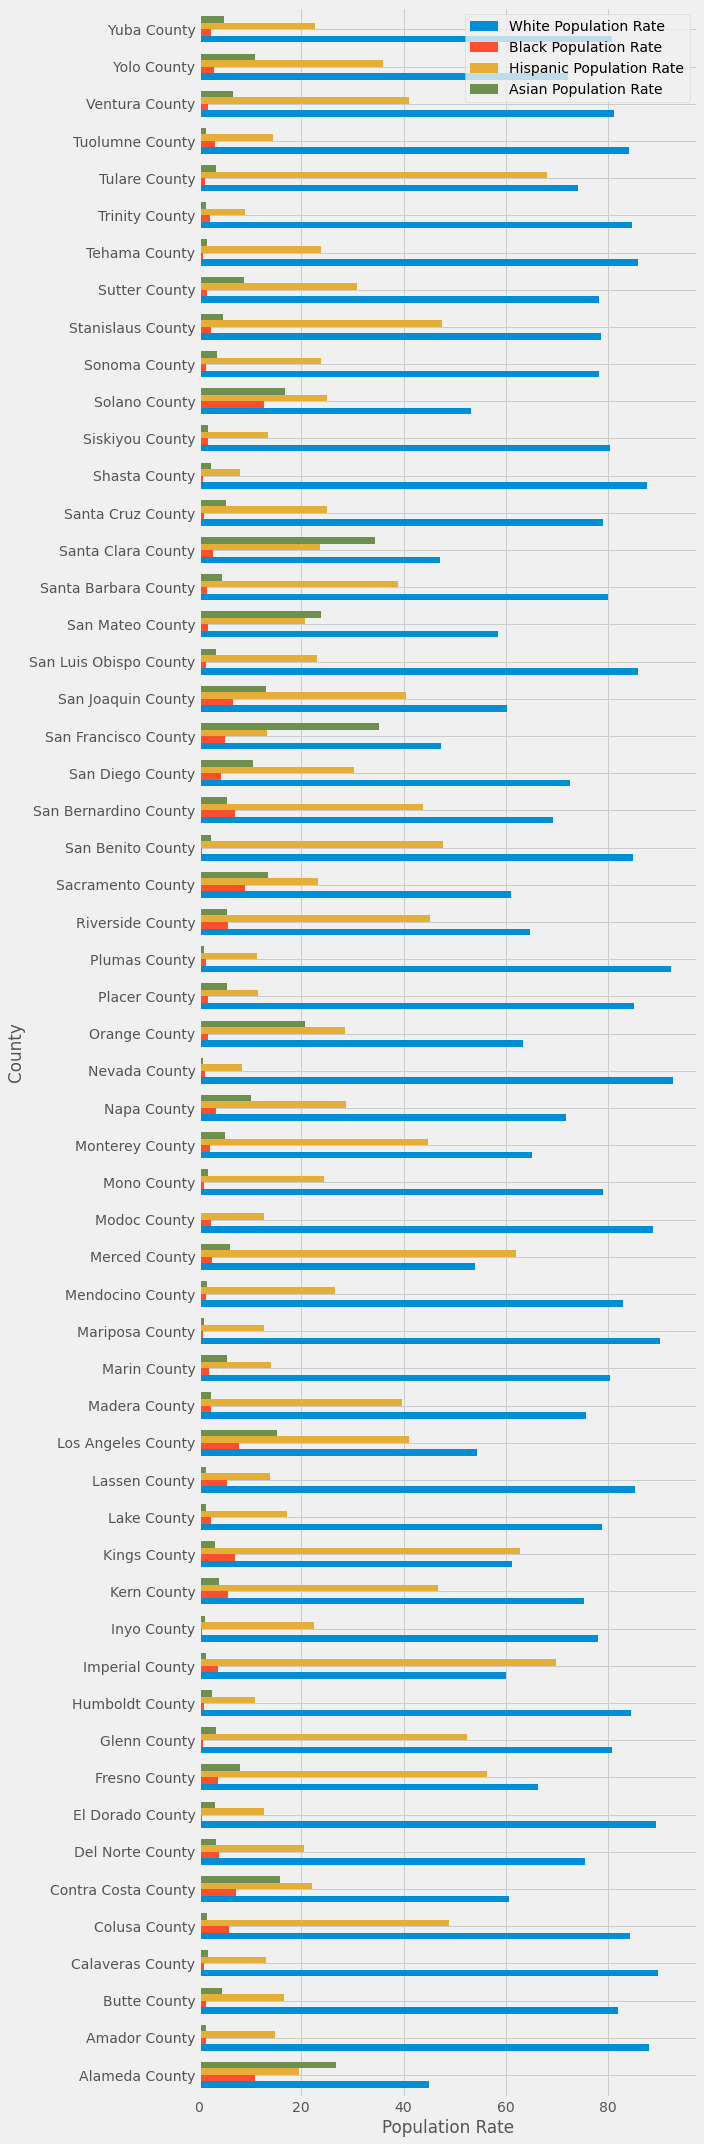

In [46]:
county_population=county_data[['White Population Rate', 'Black Population Rate',
       'Hispanic Population Rate', 'Asian Population Rate']]

county_population.plot(kind="barh",width=.7,figsize=(10,30))

plt.style.use("fivethirtyeight")
plt.xlabel("Population Rate")
plt.ylabel("County")
plt.tight_layout()
plt.show()

### *Pie chart to see percentage population in each community*

In [47]:
community_data["White"]=community_data["Population"]*community_data['White Population Rate']
total_white=community_data["White"].sum()
total_white

2298998900.0

In [48]:
community_data["Black"]=community_data["Population"]*community_data['Black Population Rate']
total_black=community_data["Black"].sum()
total_black

226049000.0

In [49]:
community_data["Hispanic"]=community_data["Population"]*community_data["Hispanic Population Rate"]
total_hispanic=community_data["Hispanic"].sum()
total_hispanic

1514322800.0

In [50]:
community_data["Asian"]=community_data["Population"]*community_data["Asian Population Rate"]
total_asian=community_data["Asian"].sum()
total_asian

567539100.0

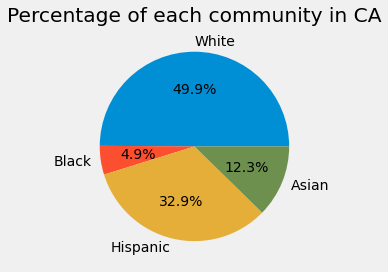

In [51]:
slices=[total_white,total_black,total_hispanic,total_asian]
labels=["White","Black","Hispanic","Asian"]

plt.style.use("fivethirtyeight")
plt.pie(slices,labels=labels,autopct="%1.1f%%")
plt.title("Percentage of each community in CA")
plt.tight_layout()
plt.show()

### *Analisys to see effect of percentage of communities on house value and monthly rent* 

### *Scatter Plot White Population Rate vs House Value*

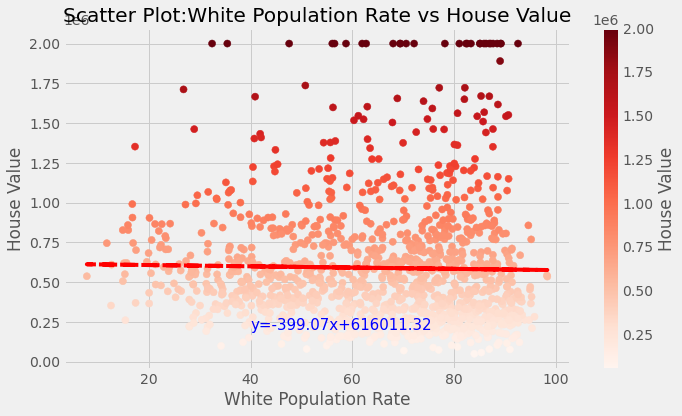

In [52]:
x_values=community_data["White Population Rate"]
y_values=community_data["House Value"]

(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

community_data.plot(kind="scatter",x="White Population Rate",y="House Value",grid=True,
                 figsize=(10,6),s=50,c="House Value",cmap="Reds")

plt.style.use("fivethirtyeight")                
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(40,200000),fontsize=15,color="blue")
plt.xlabel("White Population Rate")
plt.title("Scatter Plot:White Population Rate vs House Value")
plt.tight_layout()
plt.show()

### *Scatter Plot White Population Rate vs Monthly Rent*

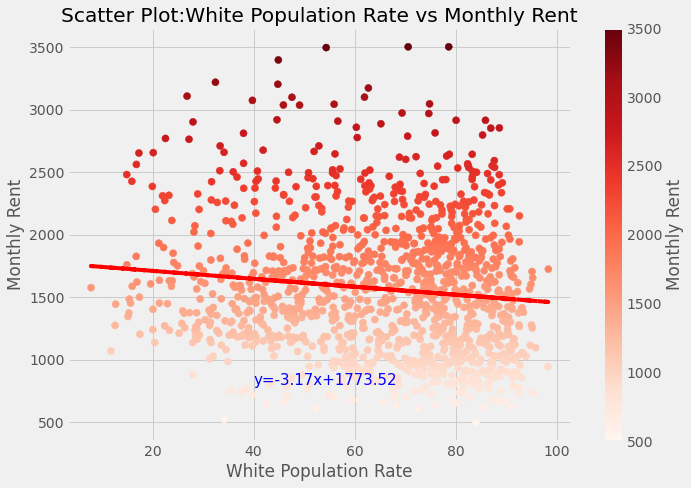

In [53]:
x_values=community_data["White Population Rate"]
y_values=community_data["Monthly Rent"]

(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

community_data.plot(kind="scatter",x="White Population Rate",y="Monthly Rent",
                   figsize=(10,7),s=50,c="Monthly Rent",cmap="Reds")

plt.style.use("fivethirtyeight")
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(40,800),fontsize=15,color="blue")
plt.xlabel("White Population Rate")
plt.title("Scatter Plot:White Population Rate vs Monthly Rent")
plt.tight_layout()
plt.show()

### *Scatter Plot: Black Population Rate vs House Value*

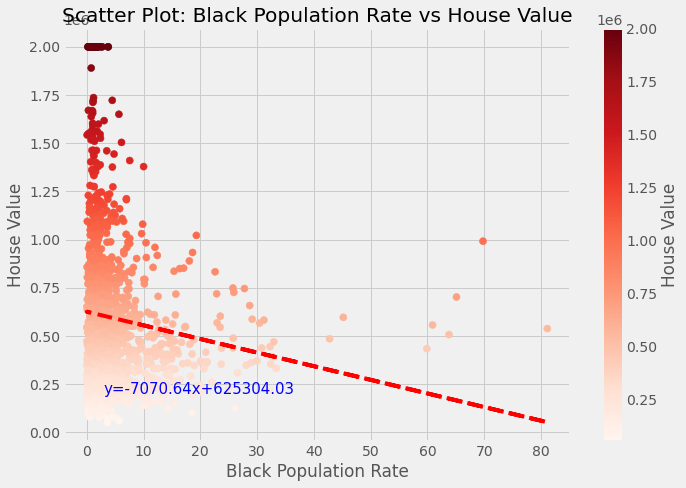

In [54]:
x_values=community_data["Black Population Rate"]
y_values=community_data["House Value"]

(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

community_data.plot(kind="scatter",x="Black Population Rate",y="House Value",
                   figsize=(10,7),s=50,c="House Value",cmap="Reds")

plt.style.use("fivethirtyeight")
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(3,200000),fontsize=15,color="blue")
plt.xlabel("Black Population Rate")
plt.title("Scatter Plot: Black Population Rate vs House Value")
plt.tight_layout()
plt.show()

### *Scatter Plot Black Population Rate vs Monthly Rent*

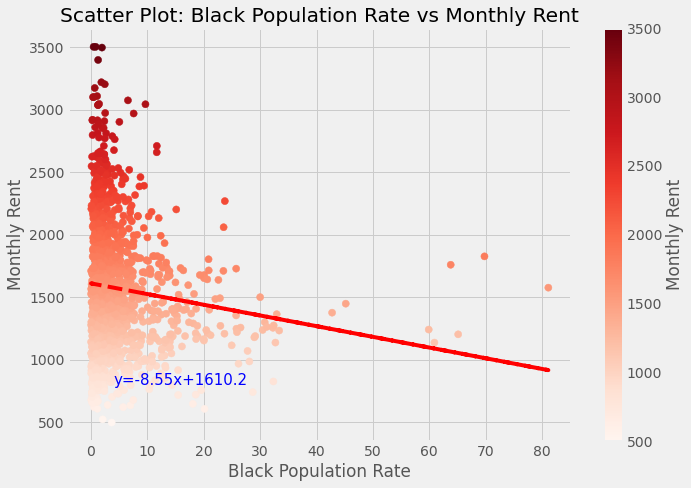

In [55]:
x_values=community_data["Black Population Rate"]
y_values=community_data["Monthly Rent"]

(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

community_data.plot(kind="scatter",x="Black Population Rate",y="Monthly Rent",
                   figsize=(10,7),s=50,c="Monthly Rent",cmap="Reds")

plt.style.use("fivethirtyeight")
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(4,800),fontsize=15,color="blue")
plt.xlabel("Black Population Rate")
plt.title("Scatter Plot: Black Population Rate vs Monthly Rent")
plt.tight_layout()
plt.show()

### *Scatter Plot:Hispanic Population Rate vs House Value*

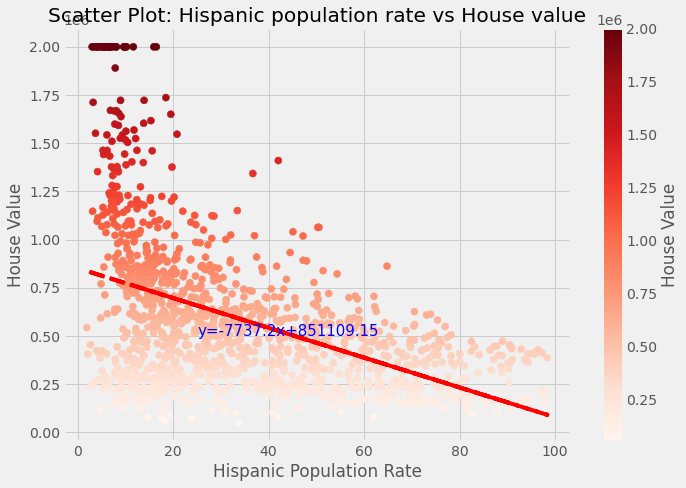

In [56]:
x_values=community_data["Hispanic Population Rate"]
y_values=community_data["House Value"]

(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

community_data.plot(kind="scatter",x="Hispanic Population Rate",y="House Value",
                   figsize=(10,7),s=50,c="House Value",cmap="Reds")

plt.style.use("fivethirtyeight")
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(25,500000),fontsize=15,color="blue")
plt.xlabel("Hispanic Population Rate")
plt.title("Scatter Plot: Hispanic population rate vs House value")
plt.tight_layout()
plt.show()

### *Scatter Plot: Hispanic Population Rate vs Monthly Rent*

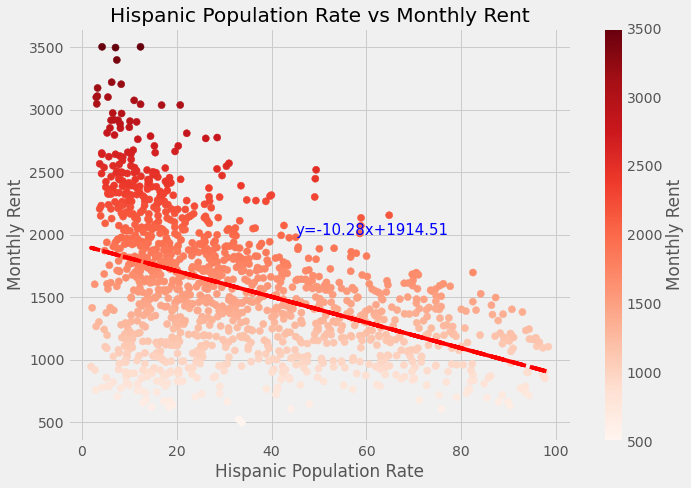

In [57]:
x_values=community_data["Hispanic Population Rate"]
y_values=community_data["Monthly Rent"]

(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

community_data.plot(kind="scatter",x="Hispanic Population Rate",y="Monthly Rent",
                   figsize=(10,7),s=50,c="Monthly Rent",cmap="Reds")

plt.style.use("fivethirtyeight")
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(45,2000),fontsize=15,color="blue")
plt.title("Hispanic Population Rate vs Monthly Rent")
plt.xlabel("Hispanic Population Rate")
plt.tight_layout()
plt.show()

### *Scatter Plot:Asian Population Rate vs House Value*

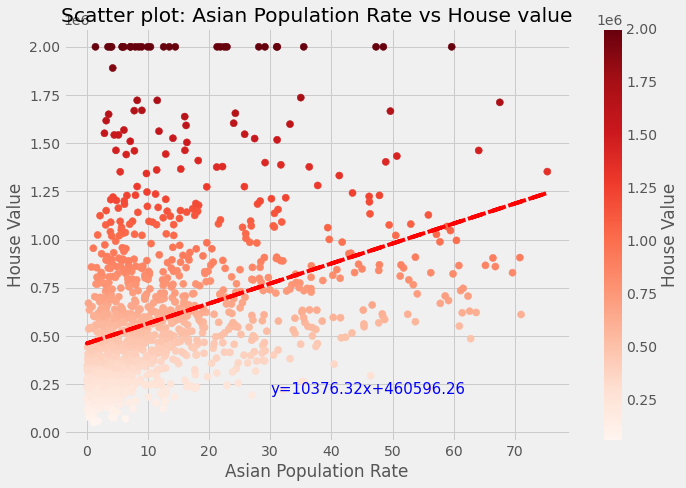

In [58]:
x_values=community_data["Asian Population Rate"]
y_values=community_data["House Value"]

(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

community_data.plot(kind="scatter",x="Asian Population Rate",y="House Value",
                   figsize=(10,7),s=50,c="House Value",cmap="Reds")

plt.style.use("fivethirtyeight")
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(30,200000),fontsize=15,color="blue")
plt.xlabel("Asian Population Rate")
plt.title("Scatter plot: Asian Population Rate vs House value")
plt.tight_layout()
plt.show()

### *Scatter Plot: Asian Population Rate vs House Value*

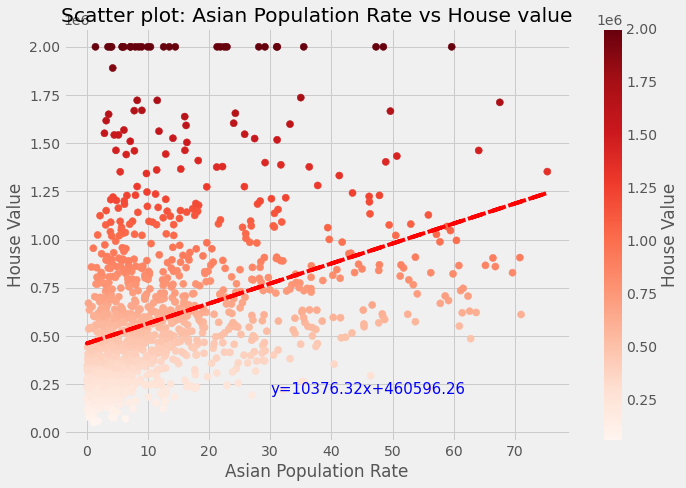

In [59]:
x_values=community_data["Asian Population Rate"]
y_values=community_data["House Value"]

(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

community_data.plot(kind="scatter",x="Asian Population Rate",y="House Value",
                   figsize=(10,7),s=50,c="House Value",cmap="Reds")
plt.style.use("fivethirtyeight")
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(30,200000),fontsize=15,color="blue")
plt.xlabel("Asian Population Rate")
plt.title("Scatter plot: Asian Population Rate vs House value")
plt.tight_layout()
plt.show()

### *Scatter Plot Asian Population Rate vs Monthly Rent*

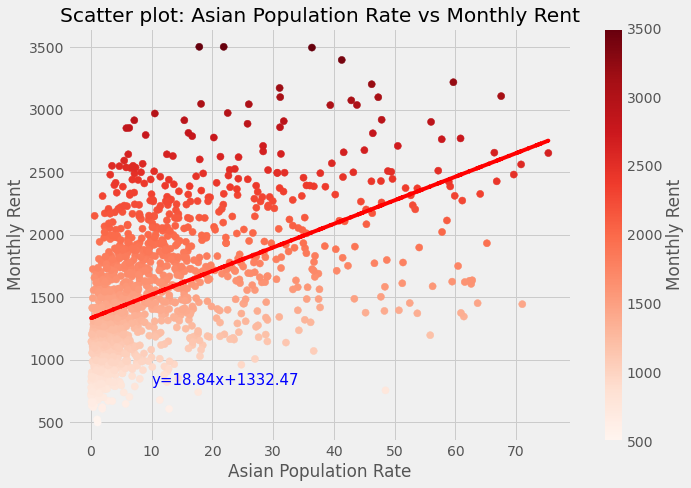

In [60]:
x_values=community_data["Asian Population Rate"]
y_values=community_data["Monthly Rent"]

(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

community_data.plot(kind="scatter",x="Asian Population Rate",y="Monthly Rent",
                   figsize=(10,7),s=50,c="Monthly Rent",cmap="Reds")

plt.style.use("fivethirtyeight")
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(10,800),fontsize=15,color="blue")
plt.xlabel("Asian Population Rate")
plt.title("Scatter plot: Asian Population Rate vs Monthly Rent")
plt.tight_layout()
plt.show()

### *Scatter Plot Per Capita Income vs House Value*

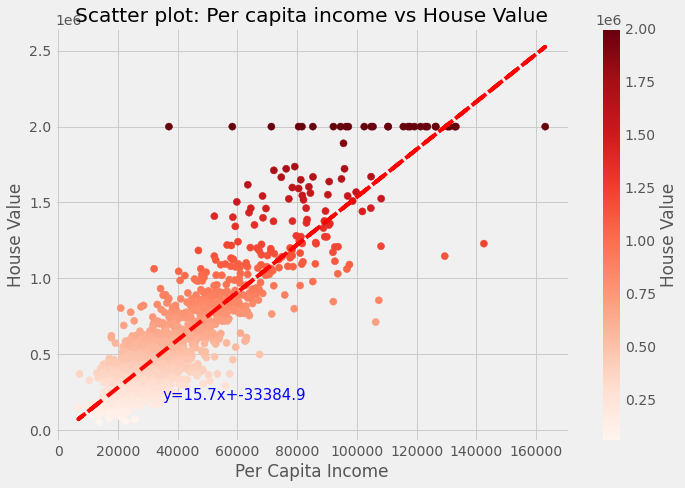

In [61]:
x_values=community_data["Per Capita Income"]
y_values=community_data["House Value"]

(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

community_data.plot(kind="scatter",x="Per Capita Income",y="House Value",
                   figsize=(10,7),s=50,c="House Value",cmap="Reds")
plt.style.use("fivethirtyeight")
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(35000,200000),fontsize=15,color="blue")
plt.xlabel("Per Capita Income")
plt.title("Scatter plot: Per capita income vs House Value")
plt.tight_layout()
plt.show()

### *Scatter Plot Per Capita Income vs Monthly Rent*

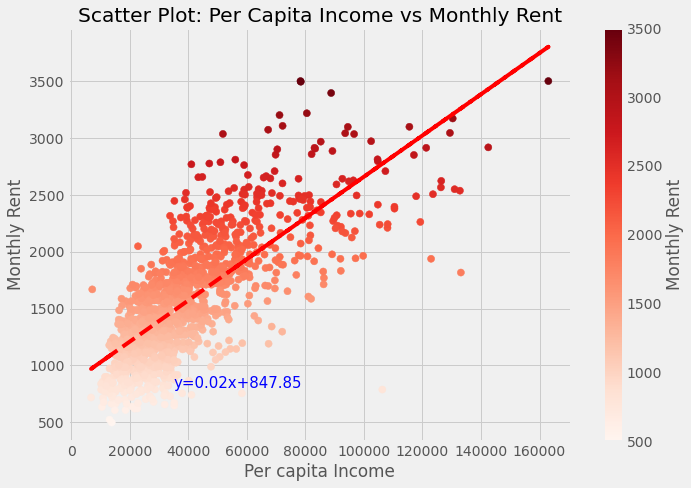

In [62]:
x_values=community_data["Per Capita Income"]
y_values=community_data["Monthly Rent"]

(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

community_data.plot(kind="scatter",x="Per Capita Income",y="Monthly Rent",
                   figsize=(10,7),s=50,c="Monthly Rent",cmap="Reds")
plt.style.use("fivethirtyeight")
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(35000,800),fontsize=15,color="blue")
plt.xlabel("Per capita Income")
plt.title("Scatter Plot: Per Capita Income vs Monthly Rent")
plt.tight_layout()
plt.show()

### *Scatter Plot:Poverty Rate vs House Value*

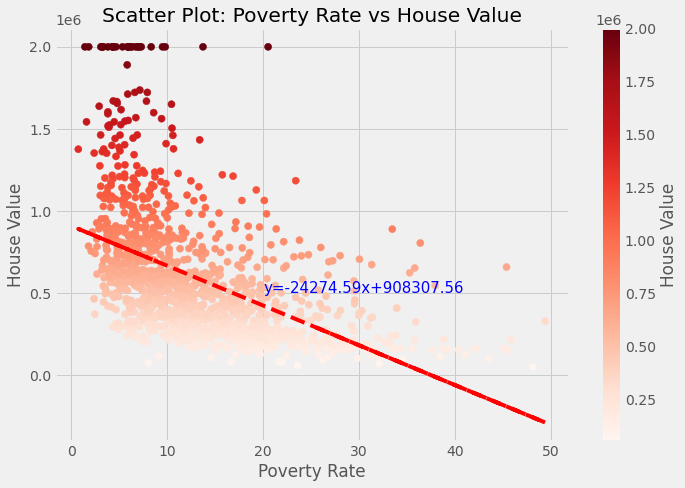

In [63]:
x_values=community_data["Poverty Rate"]
y_values=community_data["House Value"]

(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

community_data.plot(kind="scatter",x="Poverty Rate",y="House Value",
                   figsize=(10,7),s=50,c="House Value",cmap="Reds")

plt.style.use("fivethirtyeight")
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(20,500000),fontsize=15,color="blue")
plt.xlabel("Poverty Rate")
plt.title("Scatter Plot: Poverty Rate vs House Value")
plt.tight_layout()
plt.show()

### *Scatter Plot Poverty Rate vs Monthly Rent*

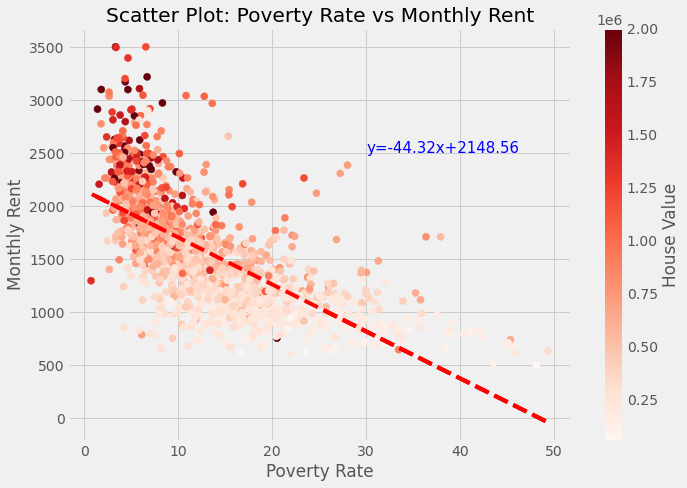

In [64]:
x_values=community_data["Poverty Rate"]
y_values=community_data["Monthly Rent"]

(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

plt.style.use("fivethirtyeight")
community_data.plot(kind="scatter",x="Poverty Rate",y="Monthly Rent",
                   figsize=(10,7),s=50,c="House Value",cmap="Reds")

plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(30,2500),fontsize=15,color="blue")
plt.xlabel("Poverty Rate")
plt.title("Scatter Plot: Poverty Rate vs Monthly Rent")
plt.tight_layout()
plt.show()

### *Scatterplot: UnemploymentRate vs House Value*

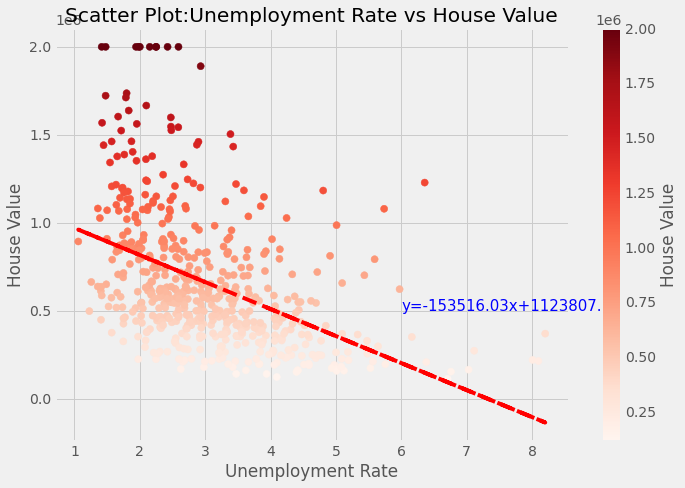

In [65]:
filt=ca_2019_data[['Unemployment Rate','Monthly Owner Cost','House Value','Monthly Rent','Public Transport Rate',
             'Personal Transport Rate','Commute Time Public', 'Commute Time Car']]>0

data=ca_2019_data[filt.all(1)]

x_values=data["Unemployment Rate"]
y_values=data["House Value"]

(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

plt.style.use("fivethirtyeight")
data.plot(kind="scatter",x="Unemployment Rate",y="House Value",
                   figsize=(10,7),s=50,c="House Value",cmap="Reds")
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(6,500000),fontsize=15,color="blue")
plt.xlabel("Unemployment Rate")
plt.title("Scatter Plot:Unemployment Rate vs House Value")
plt.tight_layout()
plt.show()


### *Scatter Plot:Unemployment Rate vs Monthly Rent*

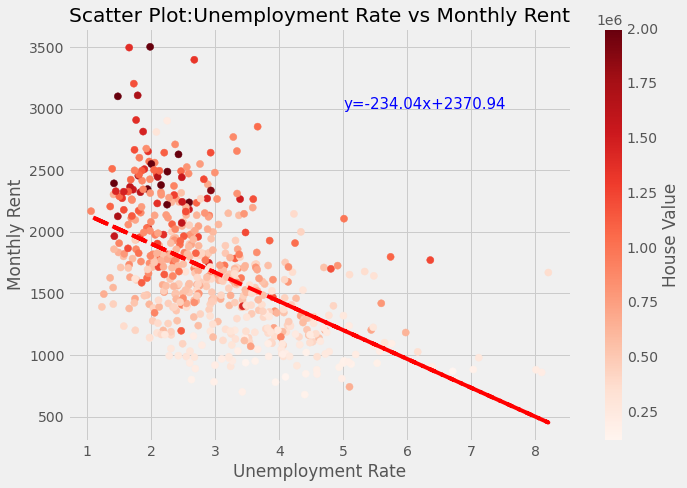

In [66]:
x_values=data["Unemployment Rate"]
y_values=data["Monthly Rent"]

(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

plt.style.use("fivethirtyeight")
data.plot(kind="scatter",x="Unemployment Rate",y="Monthly Rent",
                   figsize=(10,7),s=50,c="House Value",cmap="Reds")
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(5,3000),fontsize=15,color="blue")
plt.xlabel("Unemployment Rate")
plt.title("Scatter Plot:Unemployment Rate vs Monthly Rent")
plt.tight_layout()
plt.show()


### *Scatter Plot Public Transport Rate vs House Value*

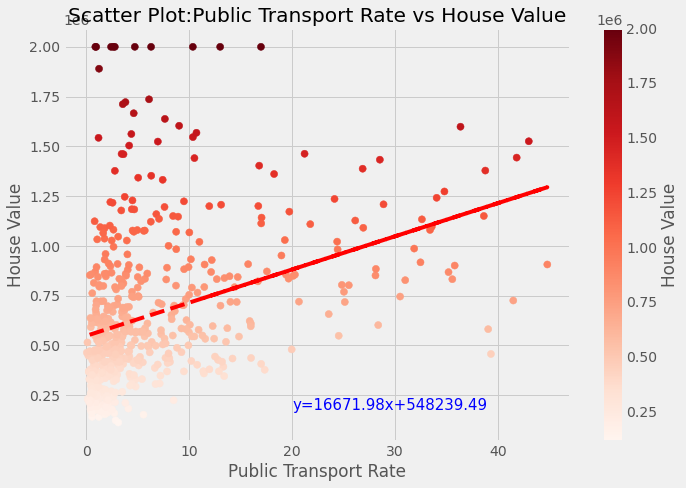

In [67]:
x_values=data["Public Transport Rate"]
y_values=data["House Value"]

(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

plt.style.use("fivethirtyeight")
data.plot(kind="scatter",x="Public Transport Rate",y="House Value",
                   figsize=(10,7),s=50,c="House Value",cmap="Reds")
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(20,175000),fontsize=15,color="blue")
plt.xlabel("Public Transport Rate")
plt.title("Scatter Plot:Public Transport Rate vs House Value")
plt.tight_layout()
plt.show()


### *Scatter Plot: Commute Time Public vs House Value*

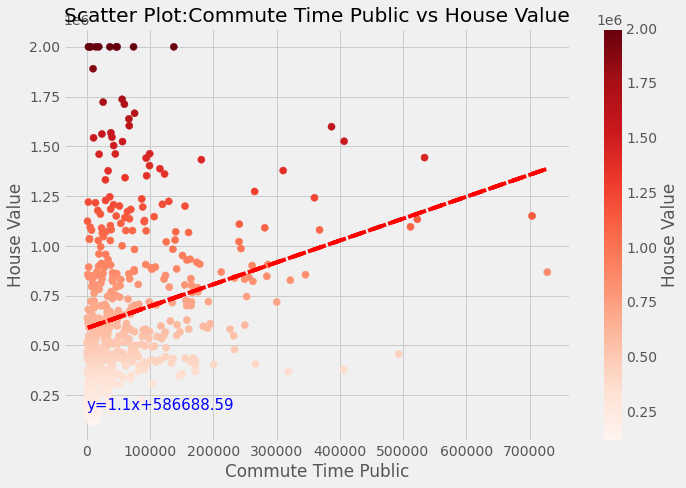

In [68]:
x_values=data["Commute Time Public"]
y_values=data["House Value"]

(slope,intercept,rvalue,pvalue,stderr)=sts.linregress(x_values,y_values)
regress_values=slope*x_values+intercept
line_eq="y="+str(round(slope,2))+"x+"+str(round(intercept,2))

plt.style.use("fivethirtyeight")
data.plot(kind="scatter",x="Commute Time Public",y="House Value",
                   figsize=(10,7),s=50,c="House Value",cmap="Reds")
plt.plot(x_values,regress_values,"r--")
plt.annotate(line_eq,(20,175000),fontsize=15,color="blue")
plt.xlabel("Commute Time Public")
plt.title("Scatter Plot:Commute Time Public vs House Value")
plt.tight_layout()
plt.show()


### *Showing Top 15 Cities Accross California*

In [69]:
city_data=ca_2019_data[['Zipcode', 'City', 'County', 'Lat', 'Lng','House Value','Household Income','Population',
       'Poverty Rate', 'Unemployment Rate','Monthly Owner Cost', 'Monthly Rent','Public Transport Rate', 'Uneducated Rate', 
        'Median Age','Per Capita Income','College Rate']]

##filtering data for negative entries
filt=city_data[['House Value','Household Income','Population','Poverty Rate', 'Unemployment Rate','Monthly Owner Cost',
                'Monthly Rent','Public Transport Rate', 'Uneducated Rate', 'Median Age','Per Capita Income','College Rate']]>0
city_data=city_data[filt.all(1)]


In [70]:
#using groupby method to groupby the data according to city
d1=city_data.groupby('City').agg({'House Value': 'mean',
                           'Household Income': 'mean',
                            'Population': 'sum',
                            'Poverty Rate': 'mean', 
                            'Unemployment Rate': 'mean',
                            'Monthly Owner Cost': 'mean', 
                            'Monthly Rent': 'mean',
                            'Public Transport Rate': 'mean', 
                            'Uneducated Rate': 'mean', 
                            'Per Capita Income': 'mean',
                            'College Rate': 'mean'}).reset_index()

#getting nlargest and nsmallest of all columns and selecting their city as a list
   
HV=d1.nsmallest(50, 'House Value')
HV_City=HV['City'].tolist()

UR=d1.nsmallest(50, 'Unemployment Rate')
UR_City=UR['City'].tolist()

PTR=d1.nlargest(50, 'Public Transport Rate')
PTR_City=PTR['City'].tolist()

PR=d1.nsmallest(50, 'Poverty Rate')
PR_City=PR['City'].tolist()

UEDR=d1.nsmallest(50, 'Uneducated Rate')
UEDR_City=UEDR['City'].tolist()

MR=d1.nsmallest(50,'Monthly Rent')
MR_City=MR['City'].tolist()

MOC=d1.nsmallest(50,'Monthly Owner Cost')
MOC_City=MOC['City'].tolist()

PCI=d1.nlargest(50,'Per Capita Income')
PCI_City=PCI['City'].tolist()

CR=d1.nsmallest(50,'College Rate')
CR_City=CR['City'].tolist()

HI=d1.nlargest(50,'Household Income')
HI_City=HI['City'].tolist()
    
#Adding  Cities from above lists to see which city is occuring most

ALL_City=HV_City + UR_City + PTR_City + PR_City + UEDR_City + MR_City + MOC_City + PCI_City + CR_City + HI_City

#Using counter to see which city occurs most in ALL_City list

Cities=[]
city_counter=Counter(ALL_City)
Best_City=city_counter.most_common(15)

Cities.append(Best_City)
    
print(Cities)

[[('Mill Valley', 6), ('Alamo', 5), ('Portola Valley', 5), ('Orinda', 5), ('San Anselmo', 5), ('Trona', 4), ('Maricopa', 4), ('Thermal', 4), ('Clearlake', 4), ('Barstow', 4), ('Westmorland', 4), ('Lamont', 4), ('Ivanhoe', 4), ('Taft', 4), ('Earlimart', 4)]]


In [71]:
top_15_cities=[]
for item in Cities[0]:
    city=item[0]
    top_15_cities.append(city)
    
top_15_cities

['Mill Valley',
 'Alamo',
 'Portola Valley',
 'Orinda',
 'San Anselmo',
 'Trona',
 'Maricopa',
 'Thermal',
 'Clearlake',
 'Barstow',
 'Westmorland',
 'Lamont',
 'Ivanhoe',
 'Taft',
 'Earlimart']

In [72]:
top_15_CA=ca_2019_data[ca_2019_data["City"].isin(top_15_cities)]
top_15_CA=top_15_CA.loc[:,["Zipcode","City","County","Lat","Lng",'House Value','Household Income','Population','Poverty Rate', 'Unemployment Rate','Monthly Owner Cost',
                'Monthly Rent','Public Transport Rate', 'Uneducated Rate', 'Median Age',
                 'Per Capita Income','College Rate']].reset_index(drop=True)

top_15_CA

Zipcode            City                 County    Lat     Lng  \
0     92274         Thermal       Riverside County  33.40 -116.10   
1     92281     Westmorland        Imperial County  33.05 -115.58   
2     92311         Barstow  San Bernardino County  35.00 -117.00   
3     93219       Earlimart          Tulare County  35.90 -119.30   
4     93235         Ivanhoe          Tulare County  36.39 -119.22   
5     93241          Lamont            Kern County  35.26 -118.91   
6     93252        Maricopa            Kern County  34.80 -119.40   
7     93268            Taft            Kern County  35.20 -119.40   
8     93562           Trona  San Bernardino County  35.90 -117.40   
9     94028  Portola Valley       San Mateo County  37.37 -122.21   
10    94507           Alamo    Contra Costa County  37.80 -122.10   
11    94563          Orinda    Contra Costa County  37.87 -122.19   
12    94941     Mill Valley           Marin County  37.90 -122.57   
13    94960     San Anselmo           Marin County  38.00 -122.59   
14    95422       Clearlake            Lake County  38.97 -122.64   

    House Value  Household Income  Population  Poverty Rate  \
0      111900.0           28660.0     15317.0     38.454005   
1      123300.0           33214.0      2591.0     31.262061   
2      121000.0           43395.0     33454.0     31.709213   
3      143500.0           32278.0     10285.0     31.638308   
4      138700.0           38859.0      4215.0     22.419929   
5      132100.0           41563.0     16397.0     28.499116   
6      103800.0           36726.0      2488.0     14.549839   
7      140900.0           39517.0     18731.0     31.450537   
8       58000.0           37176.0      1771.0     23.602484   
9     2000001.0          234091.0      7125.0      1.431579   
10    1670200.0          237841.0     15105.0      4.382655   
11    1462800.0          222930.0     19644.0      3.069640   
12    1441100.0          152125.0     32009.0      4.576838   
13    1150100.0          133381.0     15868.0      3.081674   
14     112700.0           31793.0     15696.0     32.008155   

    Unemployment Rate  Monthly Owner Cost  Monthly Rent  \
0            6.424235              1142.0         663.0   
1            5.596295              1017.0         768.0   
2            2.944341              1176.0         798.0   
3            7.078269               962.0         738.0   
4            4.626335               970.0         788.0   
5            4.226383              1022.0         813.0   
6            2.974277              1175.0         795.0   
7            3.939993              1188.0         779.0   
8            4.291361               903.0         621.0   
9            1.305263              4001.0        2914.0   
10           0.781198              4001.0        2796.0   
11           1.873346              4001.0        2813.0   
12           1.446468              4001.0        2329.0   
13           2.508193              4001.0        1964.0   
14           6.708716              1140.0         867.0   

    Public Transport Rate  Uneducated Rate  Median Age  Per Capita Income  \
0                0.120172         4.113077        34.4            13669.0   
1                2.963918         1.659591        27.5            15085.0   
2                1.519629         1.213607        31.2            20292.0   
3                0.290698         2.177929        28.6            13738.0   
4                1.452145         3.606168        34.2            13643.0   
5                0.404858         3.281088        27.2            13073.0   
6                0.600000         2.612540        38.9            13711.0   
7                1.224996         1.671027        29.8            20032.0   
8                0.815661         1.298701        39.8            22554.0   
9                0.818505         0.280702        50.9           121272.0   
10               9.583661         0.562728        49.9           104722.0   
11              21.19

### *Plotting location of top 15 cities in CA*

In [73]:
city_lat=[]
city_lng=[]

for index, row in top_15_CA.iterrows():
    lat=row["Lat"]
    lng=row["Lng"]
    city_lat.append(lat)
    city_lng.append(lng)

location=list(zip(city_lat,city_lng))

In [75]:
fig=gmaps.figure()
markers=gmaps.marker_layer(location)
fig.add_layer(markers)
fig
fig

Figure(layout=FigureLayout(height='420px'))

In [76]:
# Seeing all counties in CA
city_data["County"].value_counts()

Los Angeles County        264
Orange County              77
San Diego County           77
Riverside County           56
Santa Clara County         54
San Bernardino County      50
Alameda County             47
Sacramento County          44
Contra Costa County        34
Fresno County              28
Kern County                25
San Francisco County       24
San Mateo County           24
San Joaquin County         23
Ventura County             21
Sonoma County              19
Stanislaus County          17
Monterey County            16
Santa Barbara County       15
Santa Cruz County          14
Placer County              14
Tulare County              12
Marin County               12
San Luis Obispo County     12
Solano County              11
Butte County                9
El Dorado County            8
Humboldt County             8
Yolo County                 8
Merced County               8
Shasta County               7
Napa County                 7
Nevada County               5
Amador Cou

### *Showing Best Cities in LA counties*

In [77]:
filt=city_data["County"]=="Los Angeles County"

LA_data=city_data.loc[filt,:]

In [78]:
#using groupby  method to find best cities in LA county

d1=LA_data.groupby('City').agg({'House Value': 'mean',
                           'Household Income': 'mean',
                            'Population': 'sum',
                            'Poverty Rate': 'mean', 
                            'Unemployment Rate': 'mean',
                            'Monthly Owner Cost': 'mean', 
                            'Monthly Rent': 'mean',
                            'Public Transport Rate': 'mean', 
                            'Uneducated Rate': 'mean', 
                            'Per Capita Income': 'mean',
                            'College Rate': 'mean'}).reset_index()


#getting nlargest and nsmallest of all columns and selecting their city as a list
   
HV=d1.nsmallest(50, 'House Value')
HV_City=HV['City'].tolist()

UR=d1.nsmallest(50, 'Unemployment Rate')
UR_City=UR['City'].tolist()

PTR=d1.nlargest(50, 'Public Transport Rate')
PTR_City=PTR['City'].tolist()

PR=d1.nsmallest(50, 'Poverty Rate')
PR_City=PR['City'].tolist()

UEDR=d1.nsmallest(50, 'Uneducated Rate')
UEDR_City=UEDR['City'].tolist()

MR=d1.nsmallest(50,'Monthly Rent')
MR_City=MR['City'].tolist()

MOC=d1.nsmallest(50,'Monthly Owner Cost')
MOC_City=MOC['City'].tolist()

PCI=d1.nlargest(50,'Per Capita Income')
PCI_City=PCI['City'].tolist()

CR=d1.nsmallest(50,'College Rate')
CR_City=CR['City'].tolist()

HI=d1.nlargest(50,'Household Income')
HI_City=HI['City'].tolist()

#Adding  Cities from above lists to see which city is occuring most

ALL_City=HV_City + UR_City + PTR_City + PR_City + UEDR_City + MR_City + MOC_City + PCI_City + CR_City + HI_City

#Using counter to see which city occurs most in ALL_City list

Cities=[]
city_counter=Counter(ALL_City)
Best_City=city_counter.most_common(10)

Cities.append(Best_City)
    
print(Cities)


[[('Acton', 8), ('Lancaster', 6), ('San Fernando', 6), ('Pico Rivera', 6), ('Castaic', 6), ('Lawndale', 6), ('Lakewood', 6), ('South Pasadena', 6), ('Culver City', 6), ('Paramount', 5)]]


In [79]:
top_10_cities=[]
for item in Cities[0]:
    city=item[0]
    top_10_cities.append(city)
    
top_10_cities

['Acton',
 'Lancaster',
 'San Fernando',
 'Pico Rivera',
 'Castaic',
 'Lawndale',
 'Lakewood',
 'South Pasadena',
 'Culver City',
 'Paramount']

### *Showing Best Cities in Orange County*

In [ ]:
## GENERATE FOR OTHER COUNTIES